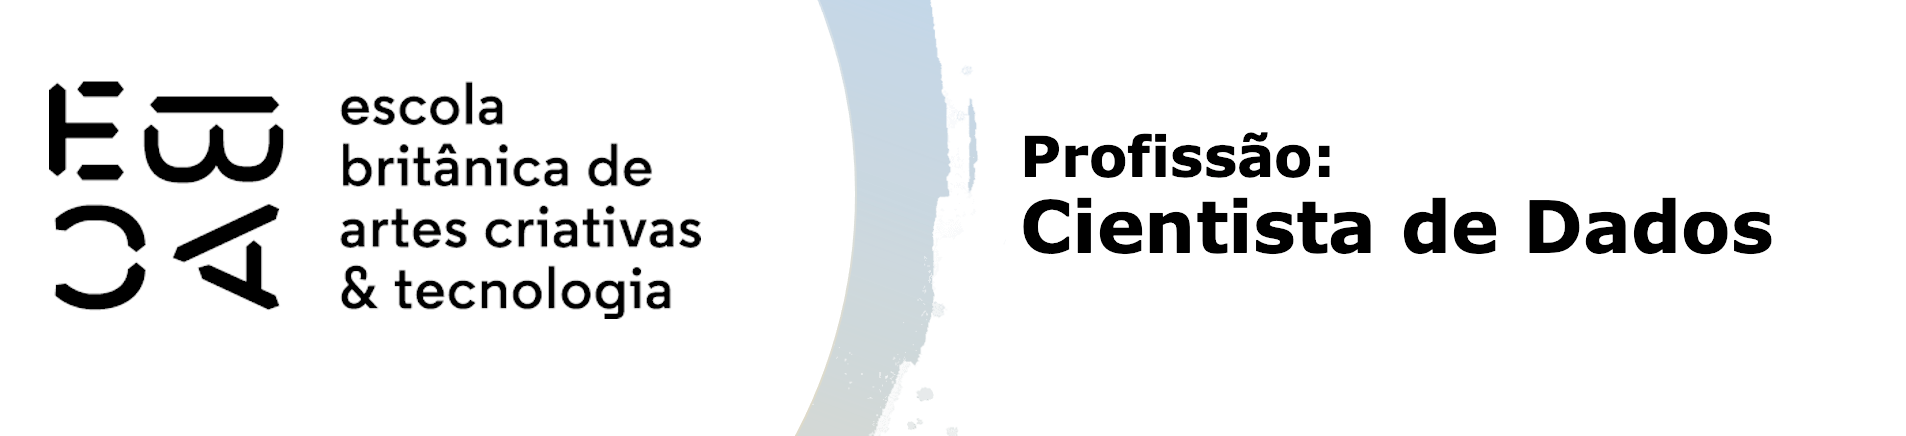

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
df = sns.load_dataset('penguins')
df.index.name='id'
df_num = df.select_dtypes(include='number').dropna()

In [3]:
padronizador = StandardScaler()
df_pad = pd.DataFrame(padronizador.fit_transform(df_num))

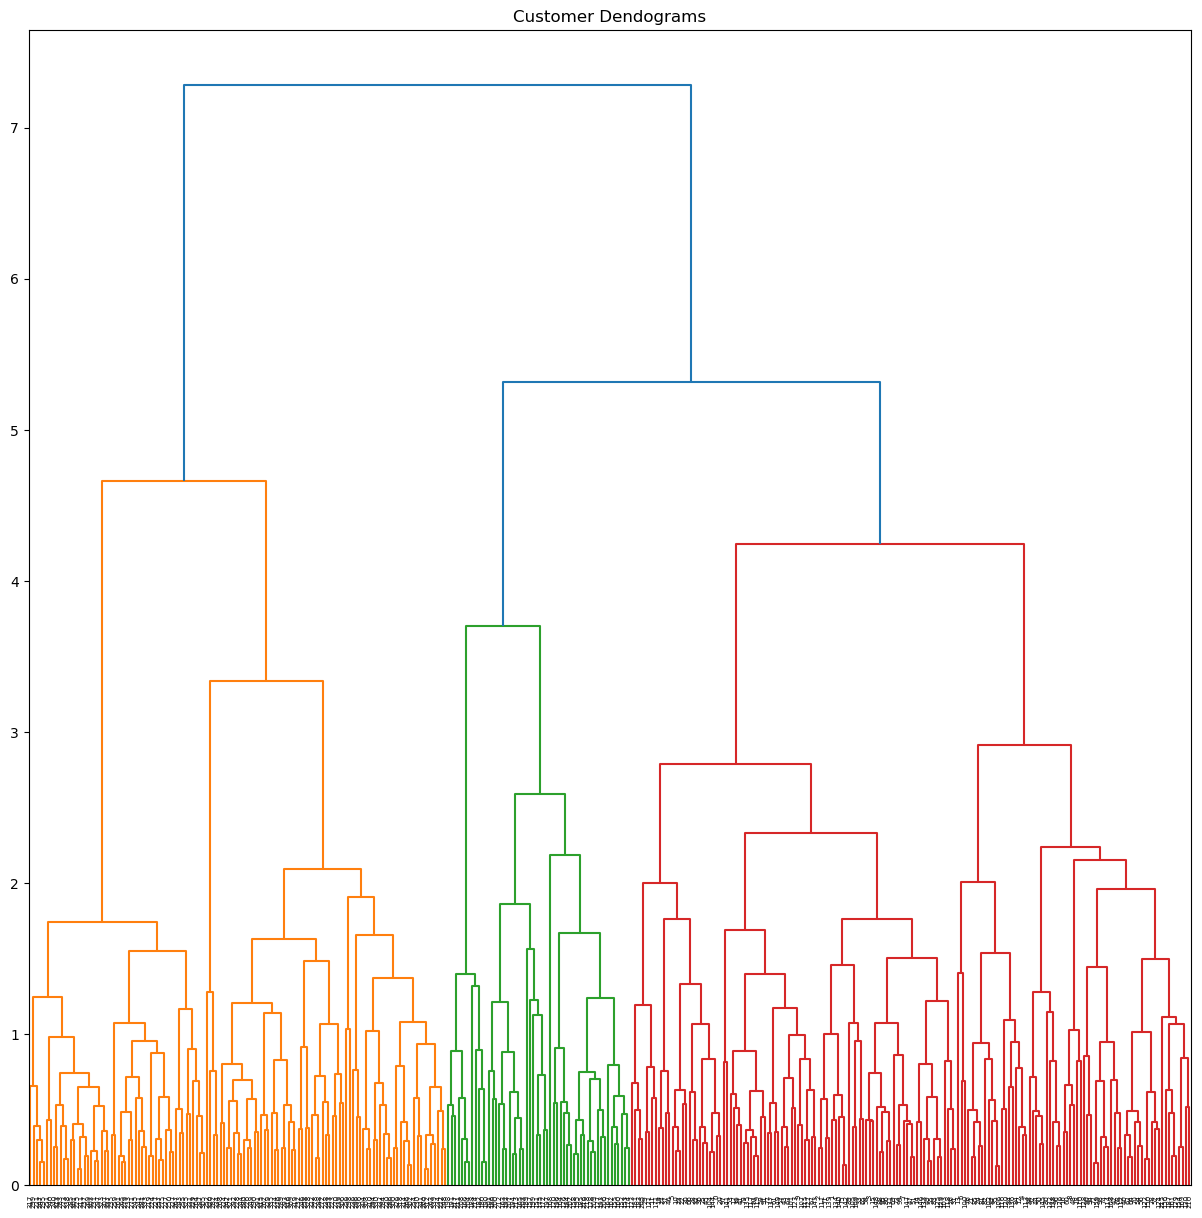

In [4]:
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

In [5]:
#aqui vamos definir o objeto para ser usado com 3 clusters
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [6]:
clus.fit(df_num)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
# vamos colocar o resultado na base original
df_num['grupo'] = clus.labels_
df_num.nunique()

bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
grupo                  3
dtype: int64

In [8]:
df = df.merge(df_num['grupo'], how='left', on='id')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0


In [9]:
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [10]:
species_grupo = df.groupby('grupo')['species'].value_counts()
species_grupo

grupo  species  
0.0    Adelie       121
       Chinstrap     59
       Gentoo         2
1.0    Gentoo        79
       Adelie        30
       Chinstrap      9
2.0    Gentoo        42
Name: species, dtype: int64

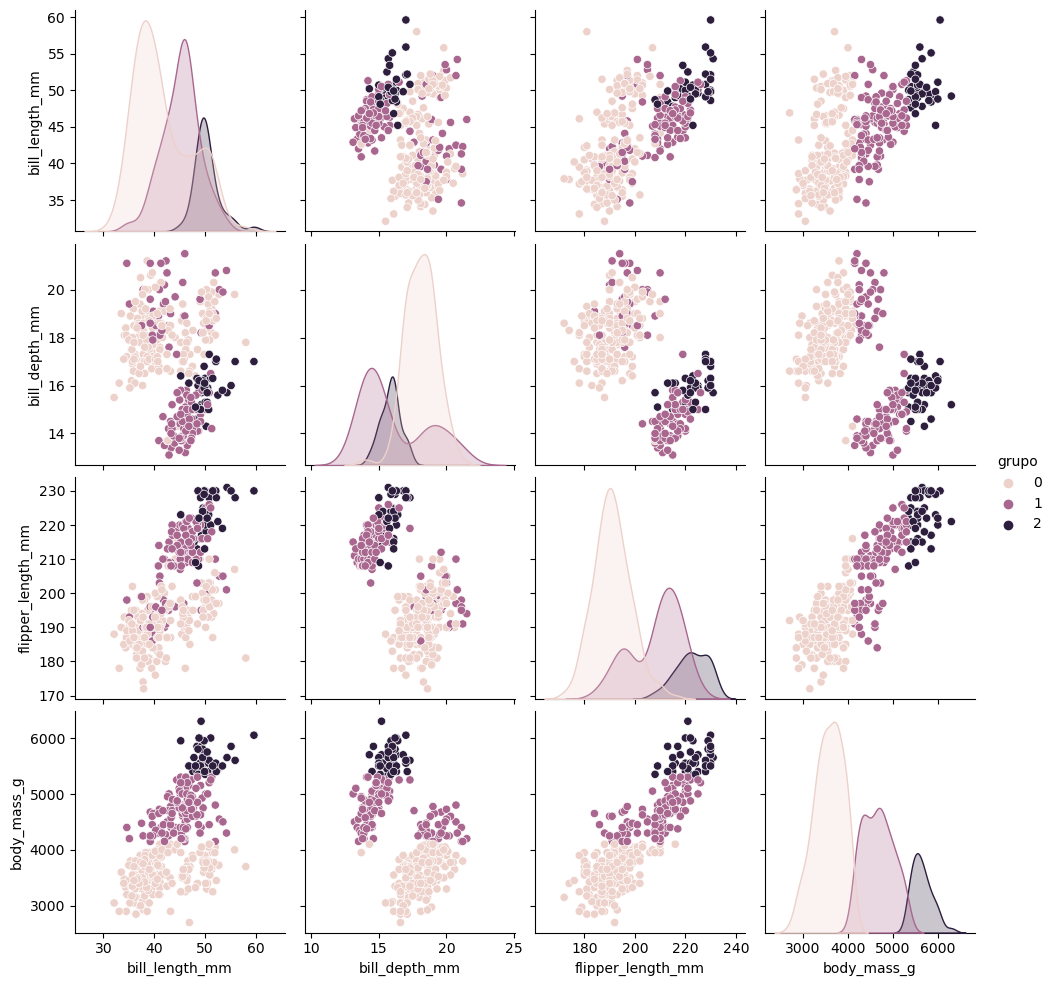

In [11]:
sns.pairplot(data=df_num, hue='grupo')

### Eu gosto muito deste grafico pois fica facil ver quais variaveis foram mais influentes na escolha dos grupos. Neste caso temos o peso e p comprimento do bico separando bem os grupos, comprimento da nadadeira entre o grupo 0 e o 1 e 2 enquanto a profundidade do bico tem o mesmo comportamento.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [12]:
#aqui vamos definir o objeto para ser usado com 6 clusters
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)

In [13]:
df_num2 = df_num

In [14]:
clus.fit(df_num2)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [15]:
# vamos colocar o resultado na base original
df_num['grupo2'] = clus.labels_

In [16]:
df = df.merge(df_num['grupo2'], how='left', on='id')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo,grupo2
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0.0


In [18]:
species_grupo = df.groupby('grupo2')['species'].value_counts()
species_grupo

grupo2  species  
0.0     Adelie       82
        Chinstrap    48
        Gentoo        2
1.0     Adelie       39
        Chinstrap    11
2.0     Gentoo       40
        Adelie       30
        Chinstrap     9
3.0     Gentoo       36
4.0     Gentoo       39
5.0     Gentoo        6
Name: species, dtype: int64

In [22]:
#famos fazer uma tabela para vizualizar os dados

table = pd.crosstab(df['grupo2'], [df['species'], df['sex']])

# Formatando a tablea
styled_table = table.style

# mudando o layout
styled_table = styled_table.set_properties(
    background_color='lightblue',
    text_align='center',
    bordercolor='gray'
)


styled_table

### Existe um padrão, na natureza macho e femea geralmente tem diferenças anatômicas, essas diferenças foram mais bem capturadas no Gentoo e no Adelie, o Chinstrap ja não teve muita diferença. Porem ao contabilizar essas diferenças fez com que espécies ficassem no mesmo grupo. Provavelmente a femea do Gentoo e o macho do Adelie tem dimenções parecidas por exemplo. 